In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn import metrics

In [2]:
df=pd.read_csv("/content/onlinefoods.csv")

In [3]:
df.head(5)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [4]:
df.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [5]:
df.shape

(388, 13)

In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [8]:
df.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

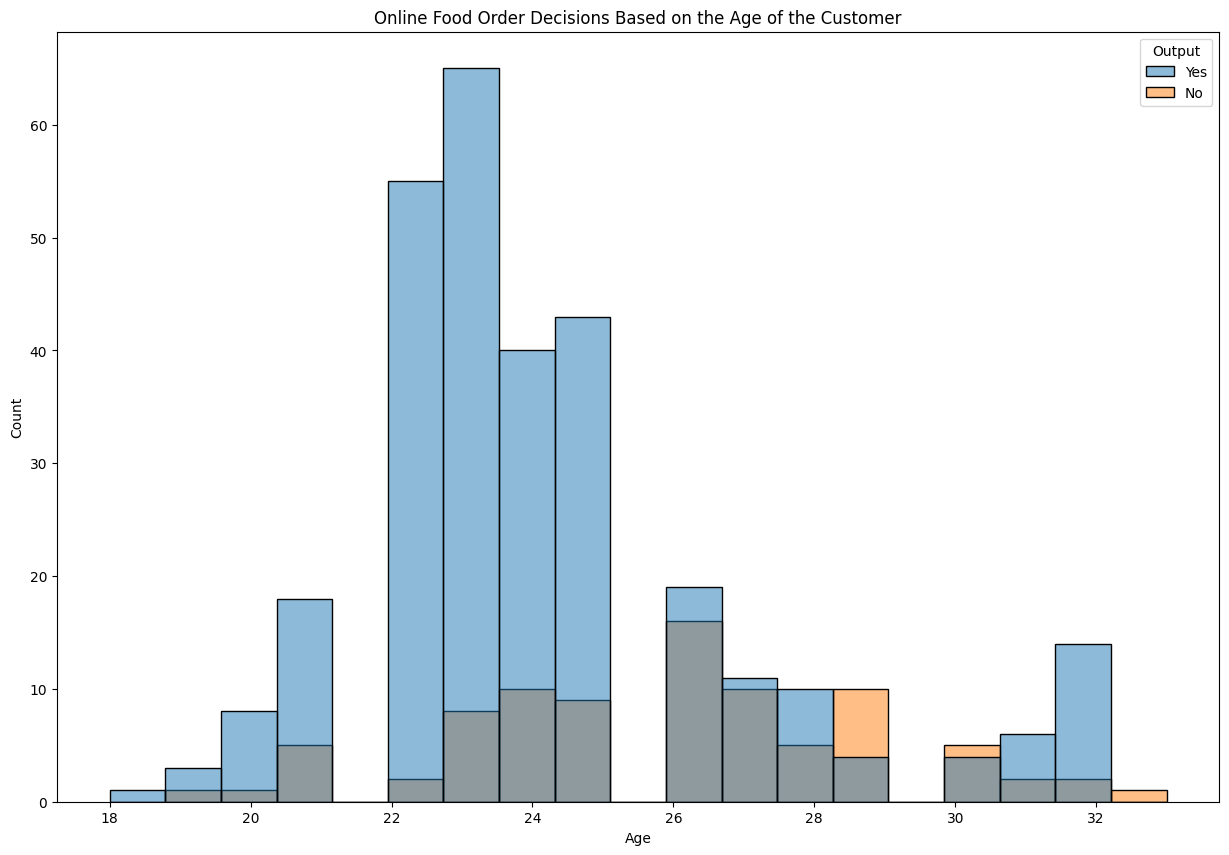

In [9]:
plt.figure(figsize=(15, 10))
plt.title("Online Food Order Decisions Based on the Age of the Customer")
sns.histplot(x="Age", hue="Output", data=df)
plt.show()

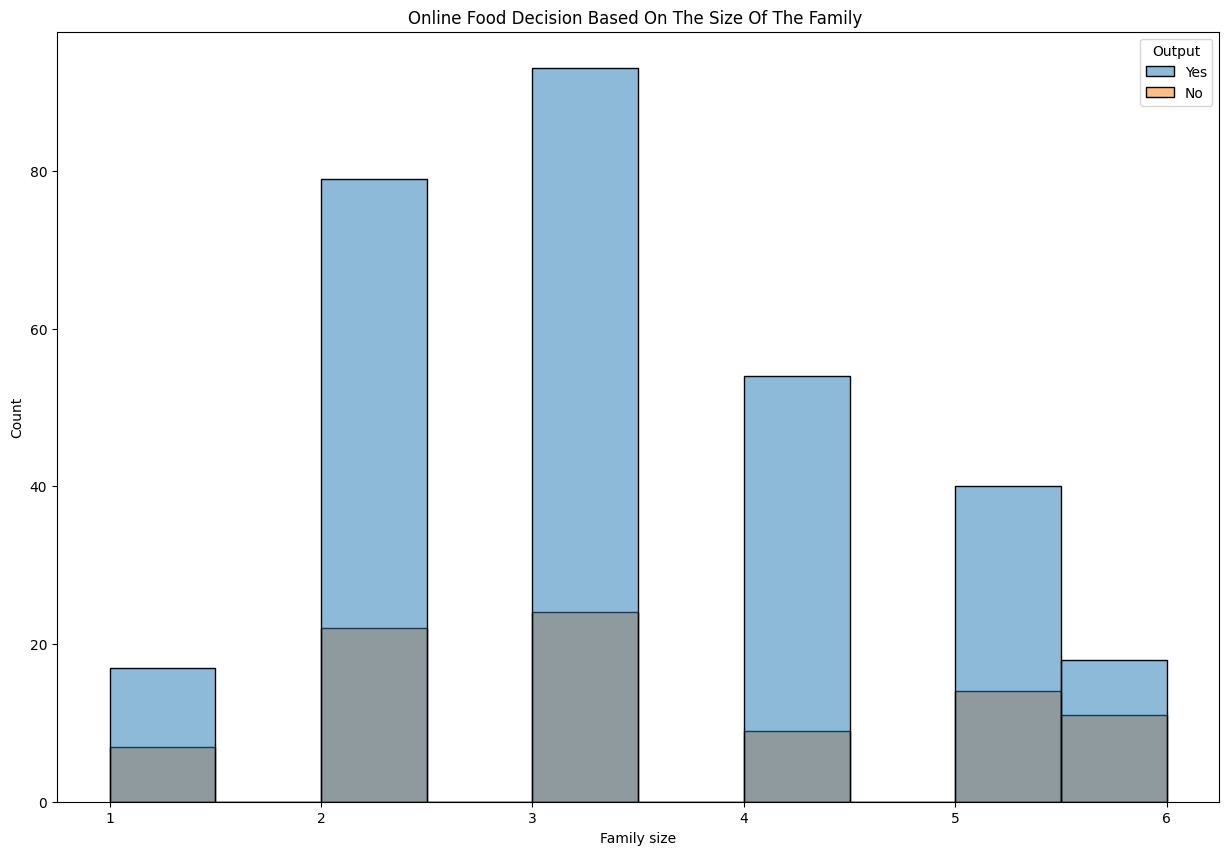

In [10]:
plt.figure(figsize=(15,10))
plt.title("Online Food Decision Based On The Size Of The Family ")
sns.histplot(x="Family size",hue="Output",data=df)
plt.show()

In [11]:
buying_again_df = df.query("Output=='Yes'")
print(buying_again_df)

     Age  Gender Marital Status Occupation  Monthly Income  \
0     20  Female         Single    Student       No Income   
1     24  Female         Single    Student  Below Rs.10000   
2     22    Male         Single    Student  Below Rs.10000   
3     22  Female         Single    Student       No Income   
4     22    Male         Single    Student  Below Rs.10000   
..   ...     ...            ...        ...             ...   
383   23  Female         Single    Student       No Income   
384   23  Female         Single    Student       No Income   
385   22  Female         Single    Student       No Income   
386   23    Male         Single    Student  Below Rs.10000   
387   23    Male         Single    Student       No Income   

    Educational Qualifications  Family size  latitude  longitude  Pin code  \
0                Post Graduate            4   12.9766    77.5993    560001   
1                     Graduate            3   12.9770    77.5773    560009   
2                Post

In [12]:
gender  = buying_again_df["Gender"].value_counts()
label = gender.index
counts = gender.values
colors = ['gold','lightgreen']
fig = go.Figure(data=[go.Pie(labels = label,values = counts)])
fig.update_layout(title_text='Who Orders Food Online More: Male Vs. Female')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

In [13]:
marital = buying_again_df["Marital Status"].value_counts()
label = marital.index
counts = marital.values
colors = ['gold','lightgreen']

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Who Orders Food Online More: Married Vs. Singles')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()


In [14]:
income = buying_again_df["Monthly Income"].value_counts()
label = income.index
counts = income.values
colors = ['gold','lightgreen']

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Which Income Group Orders Food Online More')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

In [15]:
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})
df["Marital Status"] = df["Marital Status"].map({"Married": 2,
                                                     "Single": 1,
                                                     "Prefer not to say": 0})
df["Occupation"] = df["Occupation"].map({"Student": 1,
                                             "Employee": 2,
                                             "Self Employeed": 3,
                                             "House wife": 4})
df["Educational Qualifications"] = df["Educational Qualifications"].map({"Graduate": 1,
                                                                             "Post Graduate": 2,
                                                                             "Ph.D": 3, "School": 4,
                                                                             "Uneducated": 5})
df["Monthly Income"] = df["Monthly Income"].map({"No Income": 0,
                                                     "25001 to 50000": 5000,
                                                     "More than 50000": 7000,
                                                     "10001 to 25000": 25000,
                                                     "Below Rs.10000": 10000})
df["Feedback"] = df["Feedback"].map({"Positive": 1, "Negative ": 0})
print(df.head())


   Age  Gender  Marital Status  Occupation  Monthly Income  \
0   20       0               1           1               0   
1   24       0               1           1           10000   
2   22       1               1           1           10000   
3   22       0               1           1               0   
4   22       1               1           1           10000   

   Educational Qualifications  Family size  latitude  longitude  Pin code  \
0                           2            4   12.9766    77.5993    560001   
1                           1            3   12.9770    77.5773    560009   
2                           2            3   12.9551    77.6593    560017   
3                           1            6   12.9473    77.5616    560019   
4                           2            4   12.9850    77.5533    560010   

  Output  Feedback Unnamed: 12  
0    Yes         1         Yes  
1    Yes         1         Yes  
2    Yes         0         Yes  
3    Yes         1         Yes  

In [16]:
df=df.drop(['Unnamed: 12'],axis=1)

In [17]:
df.head(5)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,0,1,1,0,2,4,12.9766,77.5993,560001,Yes,1
1,24,0,1,1,10000,1,3,12.9770,77.5773,560009,Yes,1
2,22,1,1,1,10000,2,3,12.9551,77.6593,560017,Yes,0
3,22,0,1,1,0,1,6,12.9473,77.5616,560019,Yes,1
4,22,1,1,1,10000,2,4,12.9850,77.5533,560010,Yes,1


Online Food Order Prediction Model

In [18]:
#splitting data
from sklearn.model_selection import train_test_split
x = np.array(df[["Age", "Gender", "Marital Status", "Occupation",
                   "Monthly Income", "Educational Qualifications",
                   "Family size", "Pin code", "Feedback"]])
y = np.array(df[["Output"]])


In [35]:
from sklearn.ensemble import RandomForestClassifier
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                test_size=0.20,shuffle=True,
                                                random_state=42)
model = RandomForestClassifier()

model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

0.8974358974358975


In [26]:
print("Enter Customer Details to Predict If the Customer Will Order Again")
a = int(input("Enter the Age of the Customer: "))
b = int(input("Enter the Gender of the Customer (1 = Male, 0 = Female): "))
c = int(input("Marital Status of the Customer (1 = Single, 2 = Married, 3 = Not Revealed): "))
d = int(input("Occupation of the Customer (Student = 1, Employee = 2, Self Employeed = 3, House wife = 4): "))
e = int(input("Monthly Income: "))
f = int(input("Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5): "))
g = int(input("Family Size: "))
h = int(input("Pin Code: "))
i = int(input("Review of the Last Order (1 = Positive, 0 = Negative): "))
features = np.array([[a, b, c, d, e, f, g, h, i]])
print("Finding if the customer will order again: ", model.predict(features))

In [73]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier

# pipeline
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV

0.9102564102564102
[[ 8  3]
 [ 4 63]]


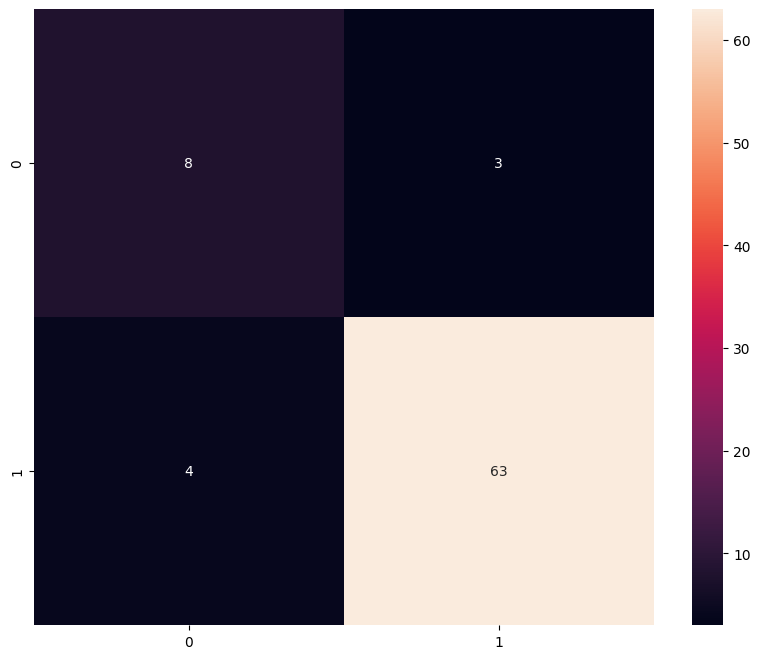

In [68]:
rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(xtrain, ytrain)

print(rfc.score(xtest, ytest))
pred = rfc.predict(xtest)

print(confusion_matrix(pred,ytest))

plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(pred,ytest), annot=True);

In [71]:
scores = cross_val_score(rfc, xtrain, ytrain,cv=5)

# average score
print("Accuracy: ", scores.mean(), scores.std() * 2)

Accuracy:  0.9 0.06255070783762999


In [74]:
parameters = {
    'randomforestclassifier__n_estimators': (20, 50, 100)
}

pipeline = make_pipeline(RandomForestClassifier())

pipeline

Pipeline(steps=[('randomforestclassifier', RandomForestClassifier())])

In [75]:
gridsearch = GridSearchCV(pipeline, parameters, verbose=1, n_jobs= -1)

In [77]:
gridsearch.fit(xtrain,ytrain)


Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(estimator=Pipeline(steps=[('randomforestclassifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__n_estimators': (20, 50, 100)},
             verbose=1)

In [78]:
print("Best score %0.3f" % gridsearch.best_score_)
print("Best parameters set: ")
best_parameters = gridsearch.best_estimator_.get_params()

for params in sorted(parameters.keys()):
    print("\t%s: %r" % (params, best_parameters[params]))

Best score 0.900
Best parameters set: 
	randomforestclassifier__n_estimators: 100


In [81]:
import random
r = random.randint(0,len(df))
print(r)
new_customer = df.drop('Output', axis=1).iloc[r]
new_customer

76


Age                               26.0000
Gender                             1.0000
Marital Status                     1.0000
Occupation                         1.0000
Monthly Income                     0.0000
Educational Qualifications         2.0000
Family size                        4.0000
latitude                          12.9048
longitude                         77.6821
Pin code                      560036.0000
Feedback                           1.0000
Name: 76, dtype: float64

In [84]:
df.iloc[r]['Output']

'Yes'